Business Scenario
A consumer goods company promotes its product using multiple advertising channels:
Television (TV)
Radio
Newspaper
The company wants to understand:
“How do different advertising channels together influence product sales?”
They also want to predict future sales based on planned advertising budgets.
You are appointed as a Data Analyst to analyze the data and build a predictive model.
📝 Tasks
Load the dataset and examine the available columns.
Use TV, Radio, and Newspaper advertising spends as input features.
Use Sales as the target variable.
Build a model that learns the relationship between advertising spends and sales.
Train the model using historical data.
Predict sales for unseen data points.
Predict sales when the advertising budget is:
TV = 150
Radio = 20
Newspaper = 30
Evaluate the model’s prediction error.
Interpret the coefficients of the model:
Which advertising medium has the strongest impact on sales?
Which medium has the least impact?
Visualize:
Actual sales vs predicted sales
Based on your analysis, suggest:
One business recommendation to improve sales
One technical improvement to improve prediction accuracy

In [3]:
import pandas as pd
dataset=pd.read_csv('advertising.csv')
print('Dataset shape:', dataset.shape)
display(dataset.head())
 
# Separate features and target
X = dataset.iloc[:, :-1].values  # all columns except last (Profit)
y = dataset.iloc[:, -1].values   # last column (Profit)
 
print('\nFeature preview (first 5 rows):')
print(X[:5])


Dataset shape: (200, 4)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9



Feature preview (first 5 rows):
[[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]]


In [4]:
# 2) Fit Model - Code
from sklearn.model_selection import train_test_split
# Splitting into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
 
print('Training samples:', X_train.shape[0])
print('Test samples:', X_test.shape[0])
 
# Train the Multiple Linear Regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
 
print('Intercept:', regressor.intercept_)
print('Number of coefficients:', len(regressor.coef_))


Training samples: 160
Test samples: 40
Intercept: 4.77320520326983
Number of coefficients: 3


In [5]:
# 3) Predict - Code
import numpy as np
# Predicting Test set results
y_pred = regressor.predict(X_test)
 
# Compare Actual vs Predicted
comparison = pd.DataFrame({
    'Actual Sales': y_test,
    'Predicted Sales': np.round(y_pred,2)
})
display(comparison.reset_index(drop=True))

,Actual Sales,Predicted Sales
0,11.3,10.71
1,8.4,8.69
2,12.0,9.58
3,25.4,24.86
4,16.7,14.66
5,8.7,8.32
6,7.2,10.43
7,18.2,18.45
8,9.2,9.73
9,16.6,17.93


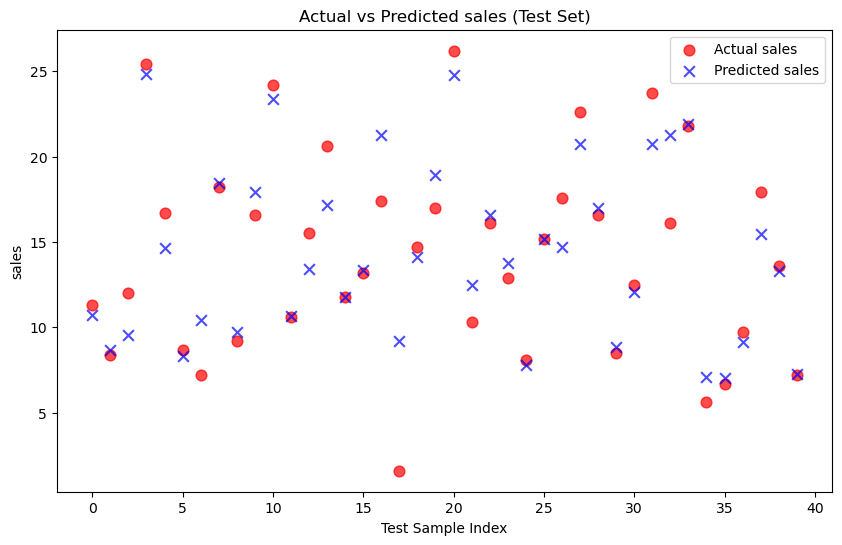

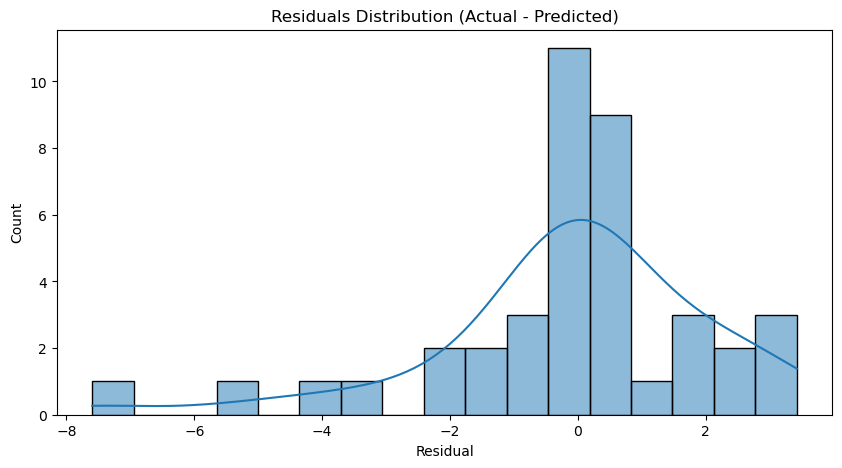

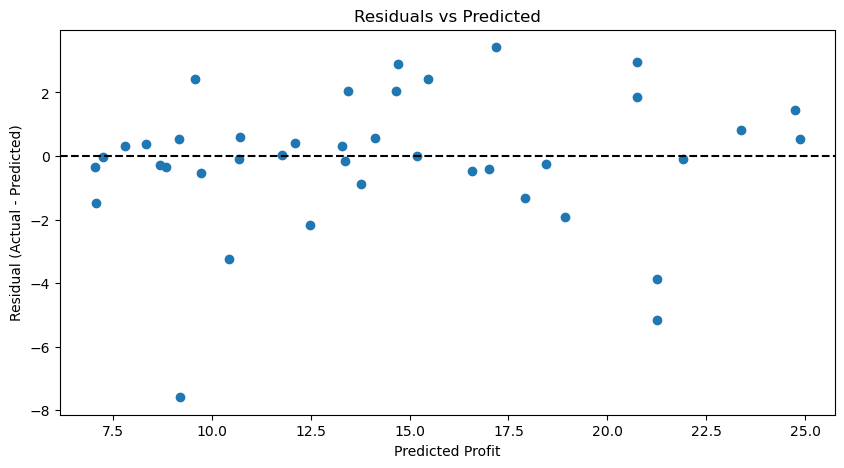

In [6]:
# 4) Visualization - Code
import matplotlib.pyplot as plt
import seaborn as sns
# Visualization: Actual vs Predicted profits (scatter)
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)), y_test, color='red', label='Actual sales', alpha=0.7, s=60)
plt.scatter(range(len(y_pred)), y_pred, color='blue', label='Predicted sales', alpha=0.7, marker='x', s=60)
plt.title('Actual vs Predicted sales (Test Set)')
plt.xlabel('Test Sample Index')
plt.ylabel('sales')
plt.legend()
plt.show()
 
# Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(10,5))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution (Actual - Predicted)')
plt.xlabel('Residual')
plt.show()
 
# Residuals vs Predicted (to check heteroscedasticity)
plt.figure(figsize=(10,5))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Profit')
plt.ylabel('Residual (Actual - Predicted)')
plt.show()

In [8]:
# Evaluation metrics & sample prediction
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
 
mse = mean_squared_error(y_test, y_pred)
 
r2 = r2_score(y_test, y_pred)
 
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R^2 Score: {r2:.4f}')


Mean Squared Error (MSE): 4.52
R^2 Score: 0.8645


In [10]:
import numpy as np
new_tv = np.array([[150,20,30]])
predicted_sales= regressor.predict(new_tv)
 
print("Predicted sales :", predicted_sales[0])

Predicted sales : 14.950388344297032


In [11]:
# Interpretation of coefficients
coefficients = regressor.coef_
feature_names = ['TV', 'Radio', 'Newspaper']
for feature, coef in zip(feature_names, coefficients):
    print(f'Coefficient for {feature}: {coef:.4f}')

Coefficient for TV: 0.0537
Coefficient for Radio: 0.1115
Coefficient for Newspaper: -0.0035


### Tv units had major impact on sales and  Newspaper has lease impact on sales.

Text(0, 0.5, 'sales')

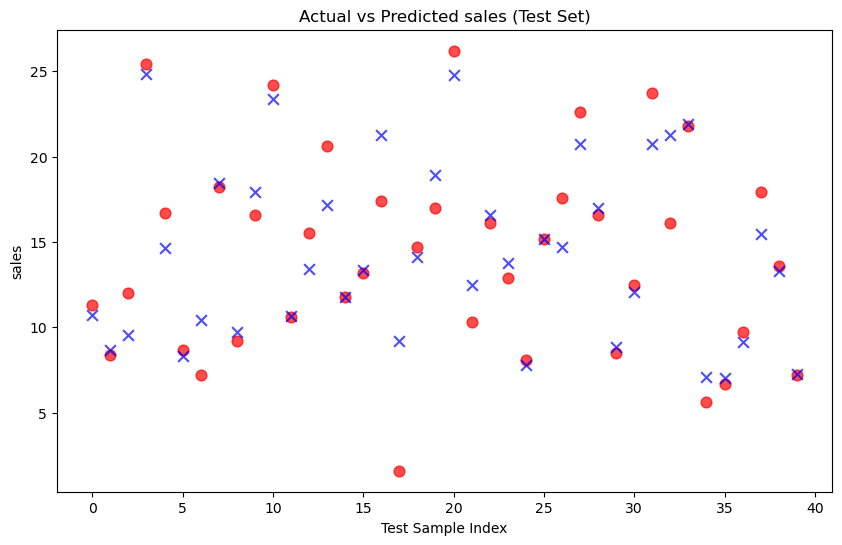

In [13]:
# Visualise the actual vs predicted sales
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)), y_test, color='red', label='Actual sales', alpha=0.7, s=60)
plt.scatter(range(len(y_pred)), y_pred, color='blue', label='Predicted sales', alpha=0.7, marker='x', s=60)
plt.title('Actual vs Predicted sales (Test Set)') 
plt.xlabel('Test Sample Index')
plt.ylabel('sales')  


### One business recommendation: Increase TV advertersing spend and decrease newspaper spend.

### One technical recommendation is perform normalisation and use proper historical data.